# (Multi)LineString `has_duplicates`
Function looks for all (Multi)LineString features that has duplicated vertices and mark them using boolean predicate.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

os.getcwd()

'/home/lukasz/Projects/geonurse/notebooks'

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

from geonurse.tools.linestring import has_duplicates, _duplicated_coordinates_list

## Load data

In [4]:
DATA_PATH = '../tests/tools/linestring/data'

### Test layer 1

#### Read data

In [5]:
linestrings = gpd.read_file(os.path.join(DATA_PATH, 'test_data_linestring_duplicates.geojson'))

In [6]:
linestrings.head()

,descriptio,id,geometry
0,line1,1,"(LINESTRING (-0.525 6.591666666666669, -0.525 ..."
1,line1 ring,2,(LINESTRING (-7.291666666666668 6.533333333333...
2,line1 dupl,3,"(LINESTRING (-13.41666666666667 6.825, -13.416..."
3,line1 ring 1dupl,4,(LINESTRING (-19.12916666666668 6.883333333333...
4,mpoly,5,(LINESTRING (7.758333333333333 12.191666666666...


#### Plot data

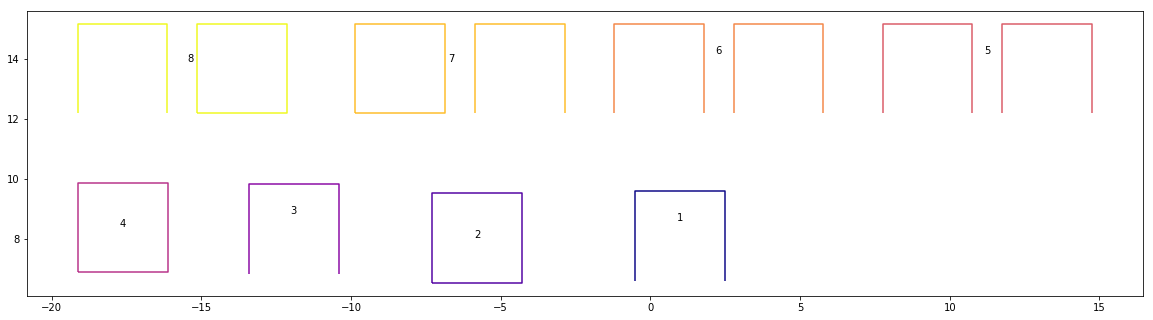

In [7]:
ax = linestrings.plot(figsize=(20,20), column='id', cmap='plasma')

linestrings.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

#### Find geometries with interiors

In [8]:
has_duplicates = linestrings.geometry.apply(has_duplicates)

assert len(linestrings) == len(has_duplicates)

linestrings_with_duplicates = linestrings[has_duplicates]  # select features that have duplicated coordinates

In [11]:
linestrings_with_duplicates.head()

,descriptio,id,geometry
2,line1 dupl,3,"(LINESTRING (-13.41666666666667 6.825, -13.416..."
3,line1 ring 1dupl,4,(LINESTRING (-19.12916666666668 6.883333333333...
5,mpoly 1left dupl,6,"(LINESTRING (-1.225 12.19166666666667, -1.225 ..."
6,mpoly 1left 1right dupl,7,(LINESTRING (-9.858333333333334 12.19166666666...
7,mpoly 2left 2right dupl,8,(LINESTRING (-19.13333333333334 12.19166666666...


#### Plot filtered geometries

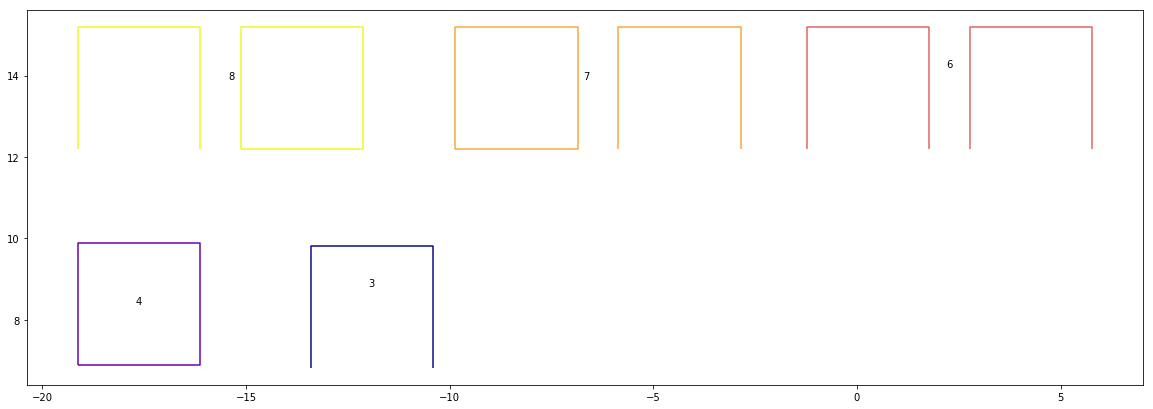

In [12]:
ax = linestrings_with_duplicates.plot(figsize=(20,20), column='id', cmap='plasma')

linestrings_with_duplicates.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

In [9]:
linestrings_with_duplicates

,descriptio,id,geometry
2,line1 dupl,3,"(LINESTRING (-13.41666666666667 6.825, -13.416..."
3,line1 ring 1dupl,4,(LINESTRING (-19.12916666666668 6.883333333333...
5,mpoly 1left dupl,6,"(LINESTRING (-1.225 12.19166666666667, -1.225 ..."
6,mpoly 1left 1right dupl,7,(LINESTRING (-9.858333333333334 12.19166666666...
7,mpoly 2left 2right dupl,8,(LINESTRING (-19.13333333333334 12.19166666666...


#### Save filtered geometries

linestrings_with_duplicates.to_file(
    os.path.join(DATA_PATH, 'expected_linestring_with_duplicates.geojson'),
    driver='GeoJSON'
)